In [1]:
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa.display
import IPython.display as ipd
import seaborn as sns

The computer has no ears. It only operates on numbers. People who have already worked with sound have created a library that allows me to work with audio files. For example, get a spectrogram.
  From this spectrogram, I can extract the Spectral centroid, Spectral rolloff, p’th-order spectral bandwidth, Zero crossing rate, Mel-frequency cepstral coefficients (MFCCs), and a chromagram from a waveform or power spectrogram. I will focus on MFCC extraction. They model the characteristics of the human voice.

In [2]:
fname_f = 'recordings/' + 'english385.wav'   
ipd.Audio(fname_f)

In [3]:
df=pd.read_csv('speakers_all.csv')
df

age  age_onset              birthplace  filename native_language  \
0     24.0       12.0         koussi, senegal   balanta         balanta   
1     18.0       10.0          buea, cameroon  cameroon        cameroon   
2     48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde   
3     42.0       42.0   port-au-prince, haiti   haitian         haitian   
4     40.0       35.0   port-au-prince, haiti   haitian         haitian   
...    ...        ...                     ...       ...             ...   
2167  46.0        5.0          lagos, nigeria   yoruba3          yoruba   
2168  46.0       12.0          lagos, nigeria   yoruba4          yoruba   
2169  47.0        2.0         ibadan, nigeria   yoruba5          yoruba   
2170  31.0        1.0     bethel, alaska, usa    yupik1           yupik   
2171  24.0       14.0      bulawayo, zimbabwe     zulu1            zulu   

         sex  speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10  \
0       male        788   senegal           True         NaN          NaN   
1       male       1953  cameroon           True         NaN          NaN   
2       male       1037   nigeria           True         NaN          NaN   
3       male       1165     haiti           True         NaN          NaN   
4       male       1166     haiti           True         NaN          NaN   
...      ...        ...       ...            ...         ...          ...   
2167  female        766   nigeria          False         NaN          NaN   
2168    male        851   nigeria          False         NaN          NaN   
2169  female       2023   nigeria          False         NaN          NaN   
2170  female        571       usa          False         NaN          NaN   
2171  female        406  zimbabwe          False         NaN          NaN   

     Unnamed: 11  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2167         NaN  
2168         NaN  
2169         NaN  
2170         NaN  
2171         NaN  

[2172 rows x 12 columns]

In [5]:
SR = 44100 #frequency

def extract_coef(aname):
  audio, _ = lr.load(aname, sr=SR) # Loading a track into memory
  # Extracting coefficients
  afs = lr.feature.mfcc(audio, # from our audio
                        sr=SR, # with a sampling rate of 44 kHz
                        n_mfcc=34, # Extracting 34 parameters
                        n_fft=2048) #Using blocks of 125ms
  # Sum all coefficients over time
  # We discard the first two, since they are not audible to a person and contain noise
  afss = np.sum(afs[2:], axis=-1)
  # Normalizing them
  afss = afss / np.max(np.abs(afss))
  return afss

In [6]:
#apply the function to each file and write the result to the list

list_set=list()
directory = 'recordings_wavv'
for filename in os.listdir(directory):
    x=str(directory+'/'+filename)
    y=extract_coef(x)
    list_set.append(filename)
    list_set.append(y)


C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00640869 0.00778198 0.00622559 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00149536 0.00234985 0.00183105 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00064087 0.00088501 0.00076294 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00057983 -0.00076294 -0.00061035 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00106812 0.00158691 0.0020752  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00372314 -0.00463867 -0.00363159 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00726318 0.00930786 0.00701904 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00085449 0.00100708 0.00085449 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00042725 -0.00085449 -0.00082397 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00039673 -0.00091553 -0.00149536 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\User

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00015259 0.00021362 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00585938 0.00817871 0.00744629 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00112915 0.00134277 0.00109863 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00076294 -0.00106812 -0.00085449 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00317383 0.00396729 0.00323486 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00305176 0.00357056 0.00228882 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.0007019  0.00100708 0.00045776 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00119019 0.00149536 0.00137329 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: 

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00601196 -0.00805664 -0.00665283 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00091553 0.00137329 0.00137329 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00021362 0.00030518 0.00033569 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00415039 0.00488281 0.00466919 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00311279 -0.00354004 -0.00320435 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00106812 -0.0012207   0.00018311 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00637817 0.00708008 0.00613403 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00720215 0.01119995 0.00698853 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00076294 -0.0005188  -0.00048828 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00076294 0.0012207  0.00149536 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00164795 -0.00106812  0.00036621 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05  3.9672852e-04  8.5449219e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.02093506 -0.02255249 -0.02313232 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/319908559

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00067139 -0.00091553 -0.00076294 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00018311 0.00039673 0.00030518 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0010376  -0.00054932 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0017395  -0.00167847 -0.00158691 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00320435 -0.00393677 -0.00302124 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00146484 -0.00164795 -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pas

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00210571 -0.00054932  0.00115967 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00253296 0.00299072 0.00268555 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00064087 -0.0007019  -0.00085449 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00881958 -0.01065063 -0.00698853 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00036621 0.00067139 0.00085449 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-1.8310547e-04 -1.5258789e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/31990855

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00018311 0.00018311 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0007019  -0.00085449 -0.0007019  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.0151062  0.02069092 0.01708984 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00323486 -0.00390625 -0.00314331 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00247192 0.00268555 0.00268555 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00018311 0.00027466 0.00030518 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00308228 0.00354004 0.0027771  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00137329 0.00143433 0.00128174 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05  6.1035156e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Tem

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00042725 -0.00189209 -0.00216675 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.         -0.00012207  0.         ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/319908559

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[3.0517578e-05 1.3427734e-03 1.8920898e-03 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00042725 -0.00048828 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00195312 0.00210571 0.00177002 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00091553 0.00109863 0.00030518 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00720215 0.00888062 0.00726318 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0005188   0.00024414  0.00039673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00039673 0.00079346 0.00088501 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00030518 0.00079346 0.00091553 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.01321411 0.01696777 0.01425171 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00213623 0.00201416 0.00036621 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00146484 -0.00189209 -0.0015564  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.01019287 -0.01208496 -0.00912476 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00445557 -0.00723267 -0.00524902 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.0027771  0.00387573 0.00375366 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00152588 0.00286865 0.00238037 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0017395  -0.00231934 -0.00247192 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00039673 -0.00286865 -0.00286865 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00036621 -0.00024414 -0.00091553 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00320435 0.00396729 0.00323486 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00189209 0.00231934 0.00036621 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.01791382 0.02124023 0.01647949 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[1.2207031e-04 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05  9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipyk

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00033569 -0.00146484 -0.00042725 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00027466 -0.00082397 -0.00115967 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00024414 0.00042725 0.00082397 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-1.8310547e-04 -1.2207031e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00253296 0.00302124 0.00216675 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00106812 -0.00100708 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/31990855

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00131226 -0.00131226 -0.00048828 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00305176 -0.00567627 -0.0057373  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.0010376  0.00128174 0.00106812 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00033569 0.00048828 0.00064087 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00305176 -0.00375366 -0.00286865 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00012207 0.00067139 0.00146484 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00018311 0.00048828 0.00064087 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00018311 0.00012207 0.00024414 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00320435 0.00308228 0.00125122 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: 

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.02124023 0.02774048 0.02255249 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00115967  0.00085449 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05  2.1362305e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/31990855

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00216675 0.00308228 0.00268555 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -2.4414062e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00149536 -0.00164795 -0.00161743 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/31990855

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00143433 -0.00158691 -0.00100708 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.01208496 0.01773071 0.01773071 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/31990855

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00067139 -0.00024414 -0.00024414 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00085449 0.00112915 0.00158691 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0007019  -0.00067139 -0.00039673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00015259 -0.00018311 -0.00027466 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[2.1362305e-04 6.1035156e-05 2.4414062e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00369263 -0.00463867 -0.00372314 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.01242065 0.01623535 0.01303101 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00299072 -0.00457764 -0.00378418 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0007019  -0.00094604 -0.00085449 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00012207 -0.00018311 -0.00024414 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00674438 0.00799561 0.00674438 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00247192 0.00402832 0.00430298 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00180054 -0.00289917 -0.00274658 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[1.5258789e-04 1.2207031e-04 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00146484 0.00241089 0.00253296 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00683594 0.00900269 0.00854492 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.01467896 0.01815796 0.01382446 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00094604 -0.0022583  -0.00363159 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00048828 -0.00036621  0.00027466 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00622559 0.00753784 0.00634766 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00497437 -0.00479126 -0.00097656 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 3.0517578e-05 -9.1552734e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00054932 -0.00064087 -0.00042725 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00982666 -0.01031494 -0.00463867 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/319908559

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.0010376  0.00149536 0.00238037 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.02102661 0.02615356 0.02706909 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00073242 0.0010376  0.00128174 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: 

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00363159 0.00439453 0.00411987 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00143433 -0.0027771  -0.00274658 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00036621  0.00024414 -0.00027466 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00094604 -0.00048828 -0.00247192 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00100708 0.00308228 0.00616455 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00143433 0.00149536 0.00137329 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: P

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00027466 0.00036621 0.00018311 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00119019 -0.00152588 -0.00100708 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/31990855

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00817871 0.00939941 0.00582886 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00842285 -0.01071167 -0.00820923 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00054932 -0.00067139 -0.00061035 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00067139 -0.00234985 -0.00402832 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.01550293 0.01898193 0.01586914 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00848389 -0.00915527 -0.00689697 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.0007019  -0.00091553 -0.00091553 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00115967 0.00112915 0.00106812 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/31990855

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00143433 -0.00137329  0.00091553 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00024414 -0.00039673 -0.00021362 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00143433 -0.00036621 -0.00027466 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pas

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00180054 -0.0020752  -0.00152588 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.01547241 -0.01940918 -0.01730347 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.0005188  0.00054932 0.00048828 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05 -2.4414062e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00247192 -0.00286865 -0.0022583  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[ 0.00128174  0.00100708 -0.00039673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/319908559

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00402832 0.00402832 0.00238037 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00021362 0.00064087 0.00076294 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00100708 0.0012207  0.00143433 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: 

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00015259  0.00042725  0.00064087 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[-0.00015259 -0.00210571  0.00100708 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pass y=[0.00817871 0.00769043 0.00741577 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  afs = lr.feature.mfcc(audio, # from our audio
C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3199085590.py:6: FutureWarning: Pa

In [30]:
#transfer result to dataframe
df_wav=pd.DataFrame()
for a in list_set:
    df_wav = df_wav.append(pd.Series(a), ignore_index=True)

In [31]:
df_wav

0    1         2         3         4         5         6   \
0     afrikaans1.wav  NaN       NaN       NaN       NaN       NaN       NaN   
1           0.446761  1.0  0.708650  0.275148 -0.326931  0.035959 -0.126270   
2     afrikaans2.wav  NaN       NaN       NaN       NaN       NaN       NaN   
3          -0.175073  1.0  0.468584  0.697326 -0.103910  0.140070 -0.092223   
4     afrikaans3.wav  NaN       NaN       NaN       NaN       NaN       NaN   
...              ...  ...       ...       ...       ...       ...       ...   
4243        0.045426  1.0  0.095569  0.822156 -0.165285  0.372029 -0.094438   
4244      xiang3.wav  NaN       NaN       NaN       NaN       NaN       NaN   
4245       -0.039898  1.0  0.224431  0.396211  0.104808  0.176470 -0.033952   
4246      xiang4.wav  NaN       NaN       NaN       NaN       NaN       NaN   
4247             NaN  NaN       NaN       NaN       NaN       NaN       NaN   

            7         8         9   ...        22        23        24  \
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1    -0.046101 -0.005190 -0.371804  ... -0.195386 -0.276220 -0.099462   
2          NaN       NaN       NaN  ...       NaN       NaN       NaN   
3    -0.216848 -0.061284 -0.145841  ... -0.048814  0.034426  0.077227   
4          NaN       NaN       NaN  ...       NaN       NaN       NaN   
...        ...       ...       ...  ...       ...       ...       ...   
4243  0.150133 -0.251055  0.047547  ... -0.010247 -0.015573 -0.035455   
4244       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4245 -0.142423  0.006376 -0.253750  ...  0.003264  0.071635 -0.025459   
4246       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4247       NaN       NaN       NaN  ...       NaN       NaN       NaN   

            25        26        27        28        29        30        31  
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1    -0.073942 -0.166494 -0.141025 -0.029062 -0.032673 -0.120572  0.015534  
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3     0.029660 -0.064787  0.007488  0.028104 -0.027506 -0.017661  0.044688  
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
...        ...       ...       ...       ...       ...       ...       ...  
4243 -0.061987 -0.037265 -0.032204 -0.006869  0.007749  0.021216 -0.015609  
4244       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4245  0.006430  0.020209 -0.005746  0.008378 -0.024967  0.004555  0.031825  
4246       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4247       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[4248 rows x 32 columns]


file name and coefficients in different rows, so further I will collect them in one row

In [32]:
df_wav[::2]

0   1   2   3   4   5   6   7   8   9   ...  22  23  24  25  \
0     afrikaans1.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
2     afrikaans2.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4     afrikaans3.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
6     afrikaans4.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
8     afrikaans5.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
...              ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
4238    xasonga1.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4240      xiang1.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4242      xiang2.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4244      xiang3.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4246      xiang4.wav NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   

      26  27  28  29  30  31  
0    NaN NaN NaN NaN NaN NaN  
2    NaN NaN NaN NaN NaN NaN  
4    NaN NaN NaN NaN NaN NaN  
6    NaN NaN NaN NaN NaN NaN  
8    NaN NaN NaN NaN NaN NaN  
...   ..  ..  ..  ..  ..  ..  
4238 NaN NaN NaN NaN NaN NaN  
4240 NaN NaN NaN NaN NaN NaN  
4242 NaN NaN NaN NaN NaN NaN  
4244 NaN NaN NaN NaN NaN NaN  
4246 NaN NaN NaN NaN NaN NaN  

[2124 rows x 32 columns]

In [33]:
df_wav[1::2]

0         1         2         3         4         5         6   \
1     0.446761  1.000000  0.708650  0.275148 -0.326931  0.035959 -0.126270   
3    -0.175073  1.000000  0.468584  0.697326 -0.103910  0.140070 -0.092223   
5     0.226795  1.000000  0.978530  0.461327  0.022756 -0.255243 -0.282096   
7     0.198228  1.000000  0.693658  0.319618  0.204532 -0.024993 -0.291632   
9     0.146315  1.000000 -0.285076  0.602942 -0.000135  0.166546  0.165730   
...        ...       ...       ...       ...       ...       ...       ...   
4239 -0.151538  1.000000  0.505570 -0.285362  0.312975 -0.497947 -0.266738   
4241 -0.566894  0.918641 -0.161488  0.151716 -1.000000  0.780240 -0.821273   
4243  0.045426  1.000000  0.095569  0.822156 -0.165285  0.372029 -0.094438   
4245 -0.039898  1.000000  0.224431  0.396211  0.104808  0.176470 -0.033952   
4247       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            7         8         9   ...        22        23        24  \
1    -0.046101 -0.005190 -0.371804  ... -0.195386 -0.276220 -0.099462   
3    -0.216848 -0.061284 -0.145841  ... -0.048814  0.034426  0.077227   
5    -0.718676 -0.763083 -0.265850  ... -0.268023 -0.209185 -0.172475   
7     0.039849 -0.029339 -0.036015  ...  0.002356 -0.088005  0.057741   
9    -0.222346  0.068625 -0.160579  ... -0.019583  0.042835  0.123120   
...        ...       ...       ...  ...       ...       ...       ...   
4239  0.270303 -0.254342  0.023616  ... -0.008505  0.058850 -0.016420   
4241 -0.030645 -0.523217 -0.529502  ... -0.248897 -0.005600 -0.183333   
4243  0.150133 -0.251055  0.047547  ... -0.010247 -0.015573 -0.035455   
4245 -0.142423  0.006376 -0.253750  ...  0.003264  0.071635 -0.025459   
4247       NaN       NaN       NaN  ...       NaN       NaN       NaN   

            25        26        27        28        29        30        31  
1    -0.073942 -0.166494 -0.141025 -0.029062 -0.032673 -0.120572  0.015534  
3     0.029660 -0.064787  0.007488  0.028104 -0.027506 -0.017661  0.044688  
5    -0.186700 -0.083625  0.000158 -0.021762  0.032518  0.007871 -0.157995  
7    -0.092203 -0.041910 -0.100221 -0.026283 -0.060107 -0.031624 -0.056250  
9     0.038252 -0.001035  0.004171 -0.013771 -0.063483 -0.013650 -0.018764  
...        ...       ...       ...       ...       ...       ...       ...  
4239 -0.042148  0.104352  0.160396  0.040072 -0.019097  0.059903  0.132517  
4241 -0.149983 -0.001289 -0.105308 -0.121910 -0.060802  0.025492 -0.005001  
4243 -0.061987 -0.037265 -0.032204 -0.006869  0.007749  0.021216 -0.015609  
4245  0.006430  0.020209 -0.005746  0.008378 -0.024967  0.004555  0.031825  
4247       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[2124 rows x 32 columns]

In [34]:
df_wav

0    1         2         3         4         5         6   \
0     afrikaans1.wav  NaN       NaN       NaN       NaN       NaN       NaN   
1           0.446761  1.0  0.708650  0.275148 -0.326931  0.035959 -0.126270   
2     afrikaans2.wav  NaN       NaN       NaN       NaN       NaN       NaN   
3          -0.175073  1.0  0.468584  0.697326 -0.103910  0.140070 -0.092223   
4     afrikaans3.wav  NaN       NaN       NaN       NaN       NaN       NaN   
...              ...  ...       ...       ...       ...       ...       ...   
4243        0.045426  1.0  0.095569  0.822156 -0.165285  0.372029 -0.094438   
4244      xiang3.wav  NaN       NaN       NaN       NaN       NaN       NaN   
4245       -0.039898  1.0  0.224431  0.396211  0.104808  0.176470 -0.033952   
4246      xiang4.wav  NaN       NaN       NaN       NaN       NaN       NaN   
4247             NaN  NaN       NaN       NaN       NaN       NaN       NaN   

            7         8         9   ...        22        23        24  \
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1    -0.046101 -0.005190 -0.371804  ... -0.195386 -0.276220 -0.099462   
2          NaN       NaN       NaN  ...       NaN       NaN       NaN   
3    -0.216848 -0.061284 -0.145841  ... -0.048814  0.034426  0.077227   
4          NaN       NaN       NaN  ...       NaN       NaN       NaN   
...        ...       ...       ...  ...       ...       ...       ...   
4243  0.150133 -0.251055  0.047547  ... -0.010247 -0.015573 -0.035455   
4244       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4245 -0.142423  0.006376 -0.253750  ...  0.003264  0.071635 -0.025459   
4246       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4247       NaN       NaN       NaN  ...       NaN       NaN       NaN   

            25        26        27        28        29        30        31  
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1    -0.073942 -0.166494 -0.141025 -0.029062 -0.032673 -0.120572  0.015534  
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3     0.029660 -0.064787  0.007488  0.028104 -0.027506 -0.017661  0.044688  
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
...        ...       ...       ...       ...       ...       ...       ...  
4243 -0.061987 -0.037265 -0.032204 -0.006869  0.007749  0.021216 -0.015609  
4244       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4245  0.006430  0.020209 -0.005746  0.008378 -0.024967  0.004555  0.031825  
4246       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4247       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[4248 rows x 32 columns]

In [35]:
df_wav['name']=df_wav[0]

In [36]:
df_wav[1::2]['name']=df_wav.name.shift(1)

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/485942819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wav[1::2]['name']=df_wav.name.shift(1)


In [37]:
df_wav

0    1         2         3         4         5         6  \
0     afrikaans1.wav  NaN       NaN       NaN       NaN       NaN       NaN   
1           0.446761  1.0  0.708650  0.275148 -0.326931  0.035959 -0.126270   
2     afrikaans2.wav  NaN       NaN       NaN       NaN       NaN       NaN   
3          -0.175073  1.0  0.468584  0.697326 -0.103910  0.140070 -0.092223   
4     afrikaans3.wav  NaN       NaN       NaN       NaN       NaN       NaN   
...              ...  ...       ...       ...       ...       ...       ...   
4243        0.045426  1.0  0.095569  0.822156 -0.165285  0.372029 -0.094438   
4244      xiang3.wav  NaN       NaN       NaN       NaN       NaN       NaN   
4245       -0.039898  1.0  0.224431  0.396211  0.104808  0.176470 -0.033952   
4246      xiang4.wav  NaN       NaN       NaN       NaN       NaN       NaN   
4247             NaN  NaN       NaN       NaN       NaN       NaN       NaN   

             7         8         9  ...        23        24        25  \
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1    -0.046101 -0.005190 -0.371804  ... -0.276220 -0.099462 -0.073942   
2          NaN       NaN       NaN  ...       NaN       NaN       NaN   
3    -0.216848 -0.061284 -0.145841  ...  0.034426  0.077227  0.029660   
4          NaN       NaN       NaN  ...       NaN       NaN       NaN   
...        ...       ...       ...  ...       ...       ...       ...   
4243  0.150133 -0.251055  0.047547  ... -0.015573 -0.035455 -0.061987   
4244       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4245 -0.142423  0.006376 -0.253750  ...  0.071635 -0.025459  0.006430   
4246       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4247       NaN       NaN       NaN  ...       NaN       NaN       NaN   

            26        27        28        29        30        31  \
0          NaN       NaN       NaN       NaN       NaN       NaN   
1    -0.166494 -0.141025 -0.029062 -0.032673 -0.120572  0.015534   
2          NaN       NaN       NaN       NaN       NaN       NaN   
3    -0.064787  0.007488  0.028104 -0.027506 -0.017661  0.044688   
4          NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...   
4243 -0.037265 -0.032204 -0.006869  0.007749  0.021216 -0.015609   
4244       NaN       NaN       NaN       NaN       NaN       NaN   
4245  0.020209 -0.005746  0.008378 -0.024967  0.004555  0.031825   
4246       NaN       NaN       NaN       NaN       NaN       NaN   
4247       NaN       NaN       NaN       NaN       NaN       NaN   

                name  
0     afrikaans1.wav  
1     afrikaans1.wav  
2     afrikaans2.wav  
3     afrikaans2.wav  
4     afrikaans3.wav  
...              ...  
4243      xiang2.wav  
4244      xiang3.wav  
4245      xiang3.wav  
4246      xiang4.wav  
4247      xiang4.wav  

[4248 rows x 33 columns]

In [38]:
for i in range (df_wav.shape [0]): 
    if i%2 == 0:
        df_wav = df_wav.drop ([i], axis = 0)

In [39]:
df_wav.reset_index(drop=True, inplace=True)


In [40]:
df_wav

0         1         2         3         4         5         6  \
0     0.446761  1.000000  0.708650  0.275148 -0.326931  0.035959 -0.126270   
1    -0.175073  1.000000  0.468584  0.697326 -0.103910  0.140070 -0.092223   
2     0.226795  1.000000  0.978530  0.461327  0.022756 -0.255243 -0.282096   
3     0.198228  1.000000  0.693658  0.319618  0.204532 -0.024993 -0.291632   
4     0.146315  1.000000 -0.285076  0.602942 -0.000135  0.166546  0.165730   
...        ...       ...       ...       ...       ...       ...       ...   
2119 -0.151538  1.000000  0.505570 -0.285362  0.312975 -0.497947 -0.266738   
2120 -0.566894  0.918641 -0.161488  0.151716 -1.000000  0.780240 -0.821273   
2121  0.045426  1.000000  0.095569  0.822156 -0.165285  0.372029 -0.094438   
2122 -0.039898  1.000000  0.224431  0.396211  0.104808  0.176470 -0.033952   
2123       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             7         8         9  ...        23        24        25  \
0    -0.046101 -0.005190 -0.371804  ... -0.276220 -0.099462 -0.073942   
1    -0.216848 -0.061284 -0.145841  ...  0.034426  0.077227  0.029660   
2    -0.718676 -0.763083 -0.265850  ... -0.209185 -0.172475 -0.186700   
3     0.039849 -0.029339 -0.036015  ... -0.088005  0.057741 -0.092203   
4    -0.222346  0.068625 -0.160579  ...  0.042835  0.123120  0.038252   
...        ...       ...       ...  ...       ...       ...       ...   
2119  0.270303 -0.254342  0.023616  ...  0.058850 -0.016420 -0.042148   
2120 -0.030645 -0.523217 -0.529502  ... -0.005600 -0.183333 -0.149983   
2121  0.150133 -0.251055  0.047547  ... -0.015573 -0.035455 -0.061987   
2122 -0.142423  0.006376 -0.253750  ...  0.071635 -0.025459  0.006430   
2123       NaN       NaN       NaN  ...       NaN       NaN       NaN   

            26        27        28        29        30        31  \
0    -0.166494 -0.141025 -0.029062 -0.032673 -0.120572  0.015534   
1    -0.064787  0.007488  0.028104 -0.027506 -0.017661  0.044688   
2    -0.083625  0.000158 -0.021762  0.032518  0.007871 -0.157995   
3    -0.041910 -0.100221 -0.026283 -0.060107 -0.031624 -0.056250   
4    -0.001035  0.004171 -0.013771 -0.063483 -0.013650 -0.018764   
...        ...       ...       ...       ...       ...       ...   
2119  0.104352  0.160396  0.040072 -0.019097  0.059903  0.132517   
2120 -0.001289 -0.105308 -0.121910 -0.060802  0.025492 -0.005001   
2121 -0.037265 -0.032204 -0.006869  0.007749  0.021216 -0.015609   
2122  0.020209 -0.005746  0.008378 -0.024967  0.004555  0.031825   
2123       NaN       NaN       NaN       NaN       NaN       NaN   

                name  
0     afrikaans1.wav  
1     afrikaans2.wav  
2     afrikaans3.wav  
3     afrikaans4.wav  
4     afrikaans5.wav  
...              ...  
2119    xasonga1.wav  
2120      xiang1.wav  
2121      xiang2.wav  
2122      xiang3.wav  
2123      xiang4.wav  

[2124 rows x 33 columns]

In [41]:
df_wav['name'] = df_wav['name'].str[:-4]

In [42]:
df_wav['name']

0       afrikaans1
1       afrikaans2
2       afrikaans3
3       afrikaans4
4       afrikaans5
           ...    
2119      xasonga1
2120        xiang1
2121        xiang2
2122        xiang3
2123        xiang4
Name: name, Length: 2124, dtype: object

In [43]:
df_wav

0         1         2         3         4         5         6  \
0     0.446761  1.000000  0.708650  0.275148 -0.326931  0.035959 -0.126270   
1    -0.175073  1.000000  0.468584  0.697326 -0.103910  0.140070 -0.092223   
2     0.226795  1.000000  0.978530  0.461327  0.022756 -0.255243 -0.282096   
3     0.198228  1.000000  0.693658  0.319618  0.204532 -0.024993 -0.291632   
4     0.146315  1.000000 -0.285076  0.602942 -0.000135  0.166546  0.165730   
...        ...       ...       ...       ...       ...       ...       ...   
2119 -0.151538  1.000000  0.505570 -0.285362  0.312975 -0.497947 -0.266738   
2120 -0.566894  0.918641 -0.161488  0.151716 -1.000000  0.780240 -0.821273   
2121  0.045426  1.000000  0.095569  0.822156 -0.165285  0.372029 -0.094438   
2122 -0.039898  1.000000  0.224431  0.396211  0.104808  0.176470 -0.033952   
2123       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             7         8         9  ...        23        24        25  \
0    -0.046101 -0.005190 -0.371804  ... -0.276220 -0.099462 -0.073942   
1    -0.216848 -0.061284 -0.145841  ...  0.034426  0.077227  0.029660   
2    -0.718676 -0.763083 -0.265850  ... -0.209185 -0.172475 -0.186700   
3     0.039849 -0.029339 -0.036015  ... -0.088005  0.057741 -0.092203   
4    -0.222346  0.068625 -0.160579  ...  0.042835  0.123120  0.038252   
...        ...       ...       ...  ...       ...       ...       ...   
2119  0.270303 -0.254342  0.023616  ...  0.058850 -0.016420 -0.042148   
2120 -0.030645 -0.523217 -0.529502  ... -0.005600 -0.183333 -0.149983   
2121  0.150133 -0.251055  0.047547  ... -0.015573 -0.035455 -0.061987   
2122 -0.142423  0.006376 -0.253750  ...  0.071635 -0.025459  0.006430   
2123       NaN       NaN       NaN  ...       NaN       NaN       NaN   

            26        27        28        29        30        31        name  
0    -0.166494 -0.141025 -0.029062 -0.032673 -0.120572  0.015534  afrikaans1  
1    -0.064787  0.007488  0.028104 -0.027506 -0.017661  0.044688  afrikaans2  
2    -0.083625  0.000158 -0.021762  0.032518  0.007871 -0.157995  afrikaans3  
3    -0.041910 -0.100221 -0.026283 -0.060107 -0.031624 -0.056250  afrikaans4  
4    -0.001035  0.004171 -0.013771 -0.063483 -0.013650 -0.018764  afrikaans5  
...        ...       ...       ...       ...       ...       ...         ...  
2119  0.104352  0.160396  0.040072 -0.019097  0.059903  0.132517    xasonga1  
2120 -0.001289 -0.105308 -0.121910 -0.060802  0.025492 -0.005001      xiang1  
2121 -0.037265 -0.032204 -0.006869  0.007749  0.021216 -0.015609      xiang2  
2122  0.020209 -0.005746  0.008378 -0.024967  0.004555  0.031825      xiang3  
2123       NaN       NaN       NaN       NaN       NaN       NaN      xiang4  

[2124 rows x 33 columns]

In [44]:
df['filename'].value_counts()

haitian       6
swiss         5
nicaragua     4
jamaican      3
hawai'i       2
             ..
english431    1
english430    1
english43     1
english429    1
zulu1         1
Name: filename, Length: 2156, dtype: int64

In [45]:
df.drop_duplicates(subset=['filename'],inplace=True)

In [46]:
df['filename'].value_counts()

balanta       1
mandarin3     1
mandarin42    1
mandarin41    1
mandarin40    1
             ..
english428    1
english427    1
english426    1
english425    1
zulu1         1
Name: filename, Length: 2156, dtype: int64

In [47]:
df_wav['filename']=df_wav['name']

In [48]:
df.drop('Unnamed: 9', inplace=True, axis=1)

In [49]:
df.drop('Unnamed: 10', inplace=True, axis=1)

In [50]:
df.drop('Unnamed: 11', inplace=True, axis=1)

In [51]:
df

age  age_onset              birthplace  filename native_language  \
0     24.0       12.0         koussi, senegal   balanta         balanta   
1     18.0       10.0          buea, cameroon  cameroon        cameroon   
2     48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde   
3     42.0       42.0   port-au-prince, haiti   haitian         haitian   
9     73.0        5.0  pepeekeo, hawai'i, usa   hawai'i         hawai'i   
...    ...        ...                     ...       ...             ...   
2167  46.0        5.0          lagos, nigeria   yoruba3          yoruba   
2168  46.0       12.0          lagos, nigeria   yoruba4          yoruba   
2169  47.0        2.0         ibadan, nigeria   yoruba5          yoruba   
2170  31.0        1.0     bethel, alaska, usa    yupik1           yupik   
2171  24.0       14.0      bulawayo, zimbabwe     zulu1            zulu   

         sex  speakerid   country  file_missing?  
0       male        788   senegal           True  
1       male       1953  cameroon           True  
2       male       1037   nigeria           True  
3       male       1165     haiti           True  
9       male       1675       usa           True  
...      ...        ...       ...            ...  
2167  female        766   nigeria          False  
2168    male        851   nigeria          False  
2169  female       2023   nigeria          False  
2170  female        571       usa          False  
2171  female        406  zimbabwe          False  

[2156 rows x 9 columns]

I merge the received dataframe with the dataframe containing information about the speakers

In [52]:
df = df.merge(df_wav, on='filename', how='left')

In [53]:
df

age  age_onset              birthplace  filename native_language  \
0     24.0       12.0         koussi, senegal   balanta         balanta   
1     18.0       10.0          buea, cameroon  cameroon        cameroon   
2     48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde   
3     42.0       42.0   port-au-prince, haiti   haitian         haitian   
4     73.0        5.0  pepeekeo, hawai'i, usa   hawai'i         hawai'i   
...    ...        ...                     ...       ...             ...   
2151  46.0        5.0          lagos, nigeria   yoruba3          yoruba   
2152  46.0       12.0          lagos, nigeria   yoruba4          yoruba   
2153  47.0        2.0         ibadan, nigeria   yoruba5          yoruba   
2154  31.0        1.0     bethel, alaska, usa    yupik1           yupik   
2155  24.0       14.0      bulawayo, zimbabwe     zulu1            zulu   

         sex  speakerid   country  file_missing?    0  ...  23  24  25  26  \
0       male        788   senegal           True  NaN  ... NaN NaN NaN NaN   
1       male       1953  cameroon           True  NaN  ... NaN NaN NaN NaN   
2       male       1037   nigeria           True  NaN  ... NaN NaN NaN NaN   
3       male       1165     haiti           True  NaN  ... NaN NaN NaN NaN   
4       male       1675       usa           True  NaN  ... NaN NaN NaN NaN   
...      ...        ...       ...            ...  ...  ...  ..  ..  ..  ..   
2151  female        766   nigeria          False  NaN  ... NaN NaN NaN NaN   
2152    male        851   nigeria          False  NaN  ... NaN NaN NaN NaN   
2153  female       2023   nigeria          False  NaN  ... NaN NaN NaN NaN   
2154  female        571       usa          False  NaN  ... NaN NaN NaN NaN   
2155  female        406  zimbabwe          False  NaN  ... NaN NaN NaN NaN   

      27  28  29  30  31  name  
0    NaN NaN NaN NaN NaN   NaN  
1    NaN NaN NaN NaN NaN   NaN  
2    NaN NaN NaN NaN NaN   NaN  
3    NaN NaN NaN NaN NaN   NaN  
4    NaN NaN NaN NaN NaN   NaN  
...   ..  ..  ..  ..  ..   ...  
2151 NaN NaN NaN NaN NaN   NaN  
2152 NaN NaN NaN NaN NaN   NaN  
2153 NaN NaN NaN NaN NaN   NaN  
2154 NaN NaN NaN NaN NaN   NaN  
2155 NaN NaN NaN NaN NaN   NaN  

[2156 rows x 42 columns]

In [54]:
df_wav[df_wav['name']=='balanta']

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, name, filename]
Index: []

[0 rows x 34 columns]

In [55]:
df['name'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
2151    True
2152    True
2153    True
2154    True
2155    True
Name: name, Length: 2156, dtype: bool

In [56]:
df = df.dropna(how='any',axis=0) 

In [57]:
df.reset_index(drop=True, inplace=True)

In [58]:
df

age  age_onset                         birthplace    filename  \
0     27.0        9.0             virginia, south africa  afrikaans1   
1     40.0        5.0             pretoria, south africa  afrikaans2   
2     43.0        4.0  pretoria, transvaal, south africa  afrikaans3   
3     26.0        8.0             pretoria, south africa  afrikaans4   
4     19.0        6.0            cape town, south africa  afrikaans5   
...    ...        ...                                ...         ...   
2113  30.0       12.0           taizhou, zhejiang, china         wu1   
2114  35.0       15.0               tambacounda, senegal    xasonga1   
2115  50.0       14.0                     taipei, taiwan      xiang1   
2116  30.0       12.0             changsha, hunan, china      xiang2   
2117  36.0       13.0             changsha, hunan, china      xiang3   

     native_language     sex  speakerid       country  file_missing?  \
0          afrikaans  female          1  south africa          False   
1          afrikaans    male          2  south africa          False   
2          afrikaans    male        418  south africa          False   
3          afrikaans    male       1159  south africa          False   
4          afrikaans    male       1432  south africa          False   
...              ...     ...        ...           ...            ...   
2113              wu  female       1646         china          False   
2114         xasonga  female        785       senegal          False   
2115           xiang  female        208        taiwan          False   
2116           xiang    male       1417         china          False   
2117           xiang    male       1522         china          False   

             0  ...        23        24        25        26        27  \
0     0.446761  ... -0.276220 -0.099462 -0.073942 -0.166494 -0.141025   
1    -0.175073  ...  0.034426  0.077227  0.029660 -0.064787  0.007488   
2     0.226795  ... -0.209185 -0.172475 -0.186700 -0.083625  0.000158   
3     0.198228  ... -0.088005  0.057741 -0.092203 -0.041910 -0.100221   
4     0.146315  ...  0.042835  0.123120  0.038252 -0.001035  0.004171   
...        ...  ...       ...       ...       ...       ...       ...   
2113  -0.09838  ... -0.090952  0.051026 -0.005045  0.000811  0.036339   
2114 -0.151538  ...  0.058850 -0.016420 -0.042148  0.104352  0.160396   
2115 -0.566894  ... -0.005600 -0.183333 -0.149983 -0.001289 -0.105308   
2116  0.045426  ... -0.015573 -0.035455 -0.061987 -0.037265 -0.032204   
2117 -0.039898  ...  0.071635 -0.025459  0.006430  0.020209 -0.005746   

            28        29        30        31        name  
0    -0.029062 -0.032673 -0.120572  0.015534  afrikaans1  
1     0.028104 -0.027506 -0.017661  0.044688  afrikaans2  
2    -0.021762  0.032518  0.007871 -0.157995  afrikaans3  
3    -0.026283 -0.060107 -0.031624 -0.056250  afrikaans4  
4    -0.013771 -0.063483 -0.013650 -0.018764  afrikaans5  
...        ...       ...       ...       ...         ...  
2113  0.034270 -0.077677  0.040159  0.113056         wu1  
2114  0.040072 -0.019097  0.059903  0.132517    xasonga1  
2115 -0.121910 -0.060802  0.025492 -0.005001      xiang1  
2116 -0.006869  0.007749  0.021216 -0.015609      xiang2  
2117  0.008378 -0.024967  0.004555  0.031825      xiang3  

[2118 rows x 42 columns]

In [59]:
df['native_language'].nunique() #check unique native languages

193

In [60]:
df.drop('file_missing?', inplace=True, axis=1)

C:\Users\ketov\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
df

age  age_onset                         birthplace    filename  \
0     27.0        9.0             virginia, south africa  afrikaans1   
1     40.0        5.0             pretoria, south africa  afrikaans2   
2     43.0        4.0  pretoria, transvaal, south africa  afrikaans3   
3     26.0        8.0             pretoria, south africa  afrikaans4   
4     19.0        6.0            cape town, south africa  afrikaans5   
...    ...        ...                                ...         ...   
2113  30.0       12.0           taizhou, zhejiang, china         wu1   
2114  35.0       15.0               tambacounda, senegal    xasonga1   
2115  50.0       14.0                     taipei, taiwan      xiang1   
2116  30.0       12.0             changsha, hunan, china      xiang2   
2117  36.0       13.0             changsha, hunan, china      xiang3   

     native_language     sex  speakerid       country         0         1  \
0          afrikaans  female          1  south africa  0.446761  1.000000   
1          afrikaans    male          2  south africa -0.175073  1.000000   
2          afrikaans    male        418  south africa  0.226795  1.000000   
3          afrikaans    male       1159  south africa  0.198228  1.000000   
4          afrikaans    male       1432  south africa  0.146315  1.000000   
...              ...     ...        ...           ...       ...       ...   
2113              wu  female       1646         china  -0.09838  1.000000   
2114         xasonga  female        785       senegal -0.151538  1.000000   
2115           xiang  female        208        taiwan -0.566894  0.918641   
2116           xiang    male       1417         china  0.045426  1.000000   
2117           xiang    male       1522         china -0.039898  1.000000   

      ...        23        24        25        26        27        28  \
0     ... -0.276220 -0.099462 -0.073942 -0.166494 -0.141025 -0.029062   
1     ...  0.034426  0.077227  0.029660 -0.064787  0.007488  0.028104   
2     ... -0.209185 -0.172475 -0.186700 -0.083625  0.000158 -0.021762   
3     ... -0.088005  0.057741 -0.092203 -0.041910 -0.100221 -0.026283   
4     ...  0.042835  0.123120  0.038252 -0.001035  0.004171 -0.013771   
...   ...       ...       ...       ...       ...       ...       ...   
2113  ... -0.090952  0.051026 -0.005045  0.000811  0.036339  0.034270   
2114  ...  0.058850 -0.016420 -0.042148  0.104352  0.160396  0.040072   
2115  ... -0.005600 -0.183333 -0.149983 -0.001289 -0.105308 -0.121910   
2116  ... -0.015573 -0.035455 -0.061987 -0.037265 -0.032204 -0.006869   
2117  ...  0.071635 -0.025459  0.006430  0.020209 -0.005746  0.008378   

            29        30        31        name  
0    -0.032673 -0.120572  0.015534  afrikaans1  
1    -0.027506 -0.017661  0.044688  afrikaans2  
2     0.032518  0.007871 -0.157995  afrikaans3  
3    -0.060107 -0.031624 -0.056250  afrikaans4  
4    -0.063483 -0.013650 -0.018764  afrikaans5  
...        ...       ...       ...         ...  
2113 -0.077677  0.040159  0.113056         wu1  
2114 -0.019097  0.059903  0.132517    xasonga1  
2115 -0.060802  0.025492 -0.005001      xiang1  
2116  0.007749  0.021216 -0.015609      xiang2  
2117 -0.024967  0.004555  0.031825      xiang3  

[2118 rows x 41 columns]

In [155]:
df['sex'].unique() #check sex column

array(['female', 'male', 'famale'], dtype=object)

In [63]:

df.loc[df['sex']=='famale', 'sex'] = 'female' #fix mistake

C:\Users\ketov\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [64]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [65]:
df['sex'].value_counts()

male      1096
female    1022
Name: sex, dtype: int64

In [66]:
df.describe()

age    age_onset    speakerid            1            2  \
count  2118.000000  2118.000000  2118.000000  2118.000000  2118.000000   
mean     33.049339     8.741265  1088.082625     0.884450     0.334215   
std      14.278484     8.362385   628.536405     0.236412     0.444176   
min       6.000000     0.000000     1.000000    -0.981439    -1.000000   
25%      22.000000     0.000000   546.250000     0.877000     0.018015   
50%      28.000000     8.000000  1088.500000     1.000000     0.336911   
75%      41.000000    13.000000  1630.750000     1.000000     0.693290   
max      97.000000    86.000000  2176.000000     1.000000     1.000000   

                 3            4            5            6            7  ...  \
count  2118.000000  2118.000000  2118.000000  2118.000000  2118.000000  ...   
mean      0.257291    -0.167358    -0.137716    -0.241554    -0.123899  ...   
std       0.401389     0.365040     0.368555     0.299593     0.278198  ...   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
25%      -0.009324    -0.387570    -0.380493    -0.429721    -0.277614  ...   
50%       0.297677    -0.138778    -0.103046    -0.218214    -0.083746  ...   
75%       0.545124     0.077665     0.122548    -0.030733     0.055831  ...   
max       1.000000     1.000000     1.000000     0.799906     0.758130  ...   

                22           23           24           25           26  \
count  2118.000000  2118.000000  2118.000000  2118.000000  2118.000000   
mean     -0.103930    -0.076868    -0.086190    -0.078541    -0.065537   
std       0.118825     0.112390     0.112337     0.097599     0.097726   
min      -0.767868    -0.649995    -0.522305    -0.536908    -0.535021   
25%      -0.172964    -0.142435    -0.155814    -0.131510    -0.120303   
50%      -0.092062    -0.065008    -0.075254    -0.070469    -0.056022   
75%      -0.021721    -0.000364    -0.009740    -0.019365    -0.005865   
max       0.416977     0.447862     0.363800     0.589693     0.306449   

                27           28           29           30           31  
count  2118.000000  2118.000000  2118.000000  2118.000000  2118.000000  
mean     -0.065108    -0.049252    -0.045460    -0.045369    -0.022082  
std       0.098624     0.095277     0.093277     0.096938     0.095570  
min      -0.464956    -0.482954    -0.566453    -0.418522    -0.390100  
25%      -0.122842    -0.102954    -0.097193    -0.102207    -0.076269  
50%      -0.060062    -0.044821    -0.044461    -0.044614    -0.027276  
75%      -0.003597     0.008748     0.006153     0.007685     0.022778  
max       0.470209     0.422579     0.551056     0.488461     0.572702  

[8 rows x 34 columns]

In [67]:
df[df['sex']=='female'].describe() #female part of dataframe

age    age_onset    speakerid            1            2  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean     34.029354     8.941292  1155.265166     0.875209     0.245205   
std      15.138719     8.824964   630.184031     0.248085     0.456920   
min       7.000000     0.000000     1.000000    -0.981439    -1.000000   
25%      22.000000     0.000000   647.750000     0.856073    -0.083469   
50%      29.000000     9.000000  1206.500000     1.000000     0.226265   
75%      43.000000    12.000000  1705.250000     1.000000     0.597125   
max      88.000000    86.000000  2176.000000     1.000000     1.000000   

                 3            4            5            6            7  ...  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  ...   
mean      0.173470    -0.276061    -0.193452    -0.296460    -0.147316  ...   
std       0.419158     0.367643     0.379821     0.307752     0.276326  ...   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
25%      -0.101738    -0.515521    -0.445466    -0.475919    -0.302783  ...   
50%       0.213643    -0.255713    -0.172450    -0.269772    -0.117293  ...   
75%       0.475956    -0.037419     0.072010    -0.086603     0.033730  ...   
max       1.000000     1.000000     1.000000     0.630342     0.714396  ...   

                22           23           24           25           26  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean     -0.116090    -0.115259    -0.112500    -0.068167    -0.072634   
std       0.119611     0.112984     0.113922     0.099187     0.103528   
min      -0.767868    -0.649995    -0.522305    -0.536908    -0.448487   
25%      -0.192636    -0.183934    -0.185793    -0.124627    -0.134350   
50%      -0.108820    -0.103325    -0.103029    -0.064267    -0.064975   
75%      -0.032496    -0.039432    -0.036431    -0.003954    -0.006136   
max       0.224262     0.210252     0.352774     0.300426     0.304712   

                27           28           29           30           31  
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  
mean     -0.077127    -0.040609    -0.035363    -0.033538    -0.001356  
std       0.106741     0.104622     0.106384     0.111758     0.112059  
min      -0.464956    -0.436895    -0.566453    -0.418522    -0.334883  
25%      -0.137807    -0.102038    -0.098594    -0.102156    -0.071293  
50%      -0.078496    -0.043120    -0.038594    -0.037392    -0.011488  
75%      -0.015701     0.019091     0.024692     0.024813     0.059586  
max       0.314956     0.422579     0.551056     0.488461     0.572702  

[8 rows x 34 columns]

In [68]:
df[df['sex']=='male'].describe()  #male part of dataframe

age    age_onset    speakerid            1            2  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     32.135493     8.554745  1025.436131     0.893067     0.417215   
std      13.369123     7.906198   620.761056     0.224756     0.415301   
min       6.000000     0.000000     2.000000    -0.503998    -0.988205   
25%      22.000000     0.000000   501.750000     0.901599     0.124961   
50%      28.000000     8.000000   997.000000     1.000000     0.432676   
75%      39.000000    13.000000  1541.250000     1.000000     0.766592   
max      97.000000    53.000000  2174.000000     1.000000     1.000000   

                 3            4            5            6            7  ...  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000  ...   
mean      0.335454    -0.065994    -0.085744    -0.190355    -0.102064  ...   
std       0.367414     0.332091     0.349988     0.282454     0.278287  ...   
min      -0.855684    -1.000000    -1.000000    -1.000000    -1.000000  ...   
25%       0.099313    -0.243957    -0.308887    -0.362194    -0.257815  ...   
50%       0.365995    -0.042680    -0.045801    -0.167037    -0.056994  ...   
75%       0.588667     0.148853     0.161703     0.011176     0.066819  ...   
max       1.000000     1.000000     1.000000     0.799906     0.758130  ...   

                22           23           24           25           26  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     -0.092591    -0.041069    -0.061657    -0.088214    -0.058919   
std       0.117009     0.099298     0.105111     0.095126     0.091540   
min      -0.613714    -0.431126    -0.453874    -0.514999    -0.535021   
25%      -0.156225    -0.091391    -0.119347    -0.140738    -0.107406   
50%      -0.074272    -0.032056    -0.050743    -0.074830    -0.049029   
75%      -0.012845     0.021762     0.010862    -0.030420    -0.005355   
max       0.416977     0.447862     0.363800     0.589693     0.306449   

                27           28           29           30           31  
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000  
mean     -0.053901    -0.057311    -0.054876    -0.056400    -0.041409  
std       0.088998     0.084909     0.078003     0.079178     0.071938  
min      -0.456916    -0.482954    -0.388568    -0.390443    -0.390100  
25%      -0.102692    -0.103374    -0.096194    -0.102409    -0.081225  
50%      -0.048287    -0.046897    -0.049958    -0.049371    -0.036430  
75%       0.004284    -0.005535    -0.004037    -0.004879     0.002560  
max       0.470209     0.242474     0.199812     0.282764     0.261010  

[8 rows x 34 columns]

In [71]:
df.to_csv('df.csv',index=False)

In [72]:
df=pd.read_csv('df.csv')

In [73]:
df

age  age_onset                         birthplace    filename  \
0     27.0        9.0             virginia, south africa  afrikaans1   
1     40.0        5.0             pretoria, south africa  afrikaans2   
2     43.0        4.0  pretoria, transvaal, south africa  afrikaans3   
3     26.0        8.0             pretoria, south africa  afrikaans4   
4     19.0        6.0            cape town, south africa  afrikaans5   
...    ...        ...                                ...         ...   
2113  30.0       12.0           taizhou, zhejiang, china         wu1   
2114  35.0       15.0               tambacounda, senegal    xasonga1   
2115  50.0       14.0                     taipei, taiwan      xiang1   
2116  30.0       12.0             changsha, hunan, china      xiang2   
2117  36.0       13.0             changsha, hunan, china      xiang3   

     native_language     sex  speakerid       country         0         1  \
0          afrikaans  female          1  south africa  0.446761  1.000000   
1          afrikaans    male          2  south africa -0.175073  1.000000   
2          afrikaans    male        418  south africa  0.226795  1.000000   
3          afrikaans    male       1159  south africa  0.198228  1.000000   
4          afrikaans    male       1432  south africa  0.146315  1.000000   
...              ...     ...        ...           ...       ...       ...   
2113              wu  female       1646         china -0.098380  1.000000   
2114         xasonga  female        785       senegal -0.151538  1.000000   
2115           xiang  female        208        taiwan -0.566894  0.918641   
2116           xiang    male       1417         china  0.045426  1.000000   
2117           xiang    male       1522         china -0.039898  1.000000   

      ...        23        24        25        26        27        28  \
0     ... -0.276220 -0.099462 -0.073942 -0.166494 -0.141025 -0.029062   
1     ...  0.034426  0.077227  0.029660 -0.064787  0.007488  0.028104   
2     ... -0.209185 -0.172475 -0.186700 -0.083625  0.000158 -0.021762   
3     ... -0.088005  0.057741 -0.092203 -0.041910 -0.100221 -0.026283   
4     ...  0.042835  0.123120  0.038252 -0.001035  0.004171 -0.013771   
...   ...       ...       ...       ...       ...       ...       ...   
2113  ... -0.090952  0.051026 -0.005045  0.000811  0.036339  0.034270   
2114  ...  0.058850 -0.016420 -0.042148  0.104352  0.160396  0.040072   
2115  ... -0.005600 -0.183333 -0.149983 -0.001289 -0.105308 -0.121910   
2116  ... -0.015573 -0.035455 -0.061987 -0.037265 -0.032204 -0.006869   
2117  ...  0.071635 -0.025459  0.006430  0.020209 -0.005746  0.008378   

            29        30        31        name  
0    -0.032673 -0.120572  0.015534  afrikaans1  
1    -0.027506 -0.017661  0.044688  afrikaans2  
2     0.032518  0.007871 -0.157995  afrikaans3  
3    -0.060107 -0.031624 -0.056250  afrikaans4  
4    -0.063483 -0.013650 -0.018764  afrikaans5  
...        ...       ...       ...         ...  
2113 -0.077677  0.040159  0.113056         wu1  
2114 -0.019097  0.059903  0.132517    xasonga1  
2115 -0.060802  0.025492 -0.005001      xiang1  
2116  0.007749  0.021216 -0.015609      xiang2  
2117 -0.024967  0.004555  0.031825      xiang3  

[2118 rows x 41 columns]

I want to see distribution of Age

In [74]:
def distribution(x,title):
    plt.figure(figsize=(15,6))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

C:\Users\ketov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


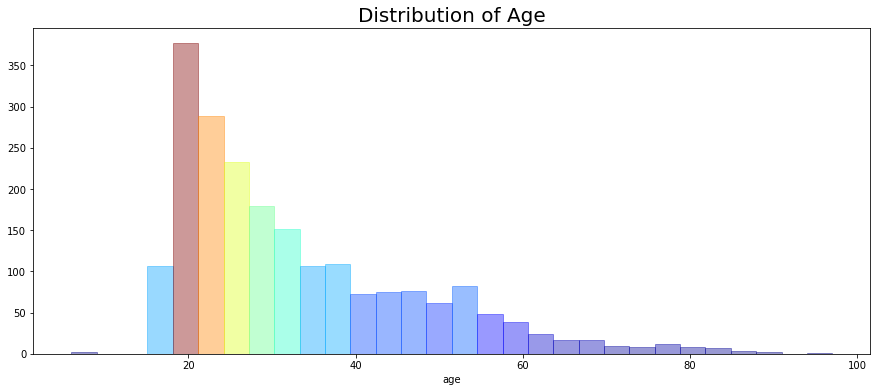

In [75]:
distribution(df.age,'Distribution of Age')

In [80]:
list_of_male=df[df['sex']=='male'].mean() #list of mean coef for male

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/3233615577.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  list_of_male=df[df['sex']=='male'].mean() #list of mean coef for male


In [81]:
list_of_male

age            32.135493
age_onset       8.554745
speakerid    1025.436131
0              -0.121464
1               0.893067
2               0.417215
3               0.335454
4              -0.065994
5              -0.085744
6              -0.190355
7              -0.102064
8              -0.198626
9              -0.090883
10             -0.156530
11             -0.094278
12             -0.058782
13             -0.078884
14             -0.108459
15              0.004728
16             -0.042396
17             -0.121813
18             -0.061111
19             -0.058305
20             -0.045956
21             -0.094062
22             -0.092591
23             -0.041069
24             -0.061657
25             -0.088214
26             -0.058919
27             -0.053901
28             -0.057311
29             -0.054876
30             -0.056400
31             -0.041409
dtype: float64

In [82]:
list_of_male=list_of_male[3:35]

In [83]:
list_of_male

0    -0.121464
1     0.893067
2     0.417215
3     0.335454
4    -0.065994
5    -0.085744
6    -0.190355
7    -0.102064
8    -0.198626
9    -0.090883
10   -0.156530
11   -0.094278
12   -0.058782
13   -0.078884
14   -0.108459
15    0.004728
16   -0.042396
17   -0.121813
18   -0.061111
19   -0.058305
20   -0.045956
21   -0.094062
22   -0.092591
23   -0.041069
24   -0.061657
25   -0.088214
26   -0.058919
27   -0.053901
28   -0.057311
29   -0.054876
30   -0.056400
31   -0.041409
dtype: float64

In [84]:
list_of_female=df[df['sex']=='female'].mean() #list of mean coef for female

C:\Users\ketov\AppData\Local\Temp/ipykernel_23268/1046343254.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  list_of_female=df[df['sex']=='female'].mean() #list of mean coef for female


In [85]:
list_of_female

age            34.029354
age_onset       8.941292
speakerid    1155.265166
0              -0.157231
1               0.875209
2               0.245205
3               0.173470
4              -0.276061
5              -0.193452
6              -0.296460
7              -0.147316
8              -0.226086
9              -0.168682
10             -0.171335
11             -0.122715
12             -0.142721
13             -0.136643
14             -0.075094
15             -0.102444
16             -0.206548
17             -0.108544
18             -0.078187
19             -0.174888
20             -0.119596
21             -0.121173
22             -0.116090
23             -0.115259
24             -0.112500
25             -0.068167
26             -0.072634
27             -0.077127
28             -0.040609
29             -0.035363
30             -0.033538
31             -0.001356
dtype: float64

In [86]:
list_of_female=list_of_female[3:35]

In [87]:
list_of_female

0    -0.157231
1     0.875209
2     0.245205
3     0.173470
4    -0.276061
5    -0.193452
6    -0.296460
7    -0.147316
8    -0.226086
9    -0.168682
10   -0.171335
11   -0.122715
12   -0.142721
13   -0.136643
14   -0.075094
15   -0.102444
16   -0.206548
17   -0.108544
18   -0.078187
19   -0.174888
20   -0.119596
21   -0.121173
22   -0.116090
23   -0.115259
24   -0.112500
25   -0.068167
26   -0.072634
27   -0.077127
28   -0.040609
29   -0.035363
30   -0.033538
31   -0.001356
dtype: float64

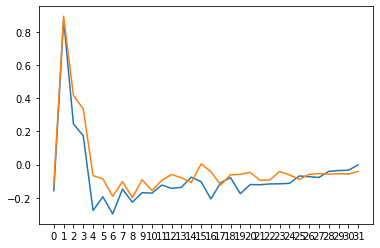

In [88]:
plt.plot(list_of_female)
plt.plot(list_of_male)
#plot

In [90]:

df_list=pd.DataFrame()
df_list['female']=list_of_female
df_list['male']=list_of_male

In [91]:
df_list['number']=list(range(1, 33))


In [92]:
df_list

female      male  number
0  -0.157231 -0.121464       1
1   0.875209  0.893067       2
2   0.245205  0.417215       3
3   0.173470  0.335454       4
4  -0.276061 -0.065994       5
5  -0.193452 -0.085744       6
6  -0.296460 -0.190355       7
7  -0.147316 -0.102064       8
8  -0.226086 -0.198626       9
9  -0.168682 -0.090883      10
10 -0.171335 -0.156530      11
11 -0.122715 -0.094278      12
12 -0.142721 -0.058782      13
13 -0.136643 -0.078884      14
14 -0.075094 -0.108459      15
15 -0.102444  0.004728      16
16 -0.206548 -0.042396      17
17 -0.108544 -0.121813      18
18 -0.078187 -0.061111      19
19 -0.174888 -0.058305      20
20 -0.119596 -0.045956      21
21 -0.121173 -0.094062      22
22 -0.116090 -0.092591      23
23 -0.115259 -0.041069      24
24 -0.112500 -0.061657      25
25 -0.068167 -0.088214      26
26 -0.072634 -0.058919      27
27 -0.077127 -0.053901      28
28 -0.040609 -0.057311      29
29 -0.035363 -0.054876      30
30 -0.033538 -0.056400      31
31 -0.001356 -0.041409      32

I want to create graph of difference of mean coef male and female

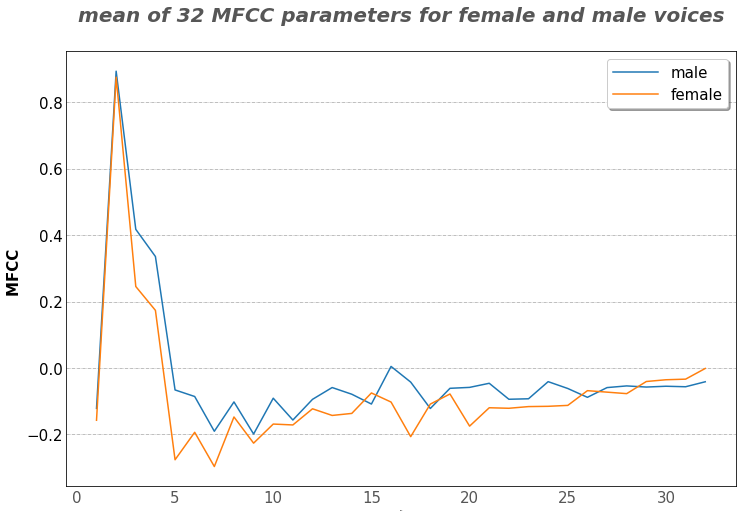

In [94]:
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df_list, x='number',y='male',palette="Set2")
sns.lineplot(data=df_list, x='number',y='female',palette="Set2")
plt.xticks(color='#565656',fontsize=1)
ax.set_xlabel('Age',weight='bold',size=0)
ax.set_ylabel('MFCC ',weight='bold',size=15)
ax.set_title('mean of 32 MFCC parameters for female and male voices',fontsize=20, weight='bold',style='italic',loc='center',pad=30,color='#565656')
ax.tick_params(labelsize=15,length=0)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.legend( ['male', 'female'], shadow=True, handlelength=3.0,fontsize=15)

In [95]:
df_for_learn=df

In [96]:
df_for_learn.drop(['age', 'age_onset', 'birthplace','filename','native_language','speakerid','country'], axis=1,inplace=True)

In [97]:
df_for_learn #it will be dataframe for learning neural network

sex         0         1         2         3         4         5  \
0     female  0.446761  1.000000  0.708650  0.275148 -0.326931  0.035959   
1       male -0.175073  1.000000  0.468584  0.697326 -0.103910  0.140070   
2       male  0.226795  1.000000  0.978530  0.461327  0.022756 -0.255243   
3       male  0.198228  1.000000  0.693658  0.319618  0.204532 -0.024993   
4       male  0.146315  1.000000 -0.285076  0.602942 -0.000135  0.166546   
...      ...       ...       ...       ...       ...       ...       ...   
2113  female -0.098380  1.000000  0.413817 -0.142392 -0.031974  0.167398   
2114  female -0.151538  1.000000  0.505570 -0.285362  0.312975 -0.497947   
2115  female -0.566894  0.918641 -0.161488  0.151716 -1.000000  0.780240   
2116    male  0.045426  1.000000  0.095569  0.822156 -0.165285  0.372029   
2117    male -0.039898  1.000000  0.224431  0.396211  0.104808  0.176470   

             6         7         8  ...        23        24        25  \
0    -0.126270 -0.046101 -0.005190  ... -0.276220 -0.099462 -0.073942   
1    -0.092223 -0.216848 -0.061284  ...  0.034426  0.077227  0.029660   
2    -0.282096 -0.718676 -0.763083  ... -0.209185 -0.172475 -0.186700   
3    -0.291632  0.039849 -0.029339  ... -0.088005  0.057741 -0.092203   
4     0.165730 -0.222346  0.068625  ...  0.042835  0.123120  0.038252   
...        ...       ...       ...  ...       ...       ...       ...   
2113  0.143215 -0.059115 -0.156277  ... -0.090952  0.051026 -0.005045   
2114 -0.266738  0.270303 -0.254342  ...  0.058850 -0.016420 -0.042148   
2115 -0.821273 -0.030645 -0.523217  ... -0.005600 -0.183333 -0.149983   
2116 -0.094438  0.150133 -0.251055  ... -0.015573 -0.035455 -0.061987   
2117 -0.033952 -0.142423  0.006376  ...  0.071635 -0.025459  0.006430   

            26        27        28        29        30        31        name  
0    -0.166494 -0.141025 -0.029062 -0.032673 -0.120572  0.015534  afrikaans1  
1    -0.064787  0.007488  0.028104 -0.027506 -0.017661  0.044688  afrikaans2  
2    -0.083625  0.000158 -0.021762  0.032518  0.007871 -0.157995  afrikaans3  
3    -0.041910 -0.100221 -0.026283 -0.060107 -0.031624 -0.056250  afrikaans4  
4    -0.001035  0.004171 -0.013771 -0.063483 -0.013650 -0.018764  afrikaans5  
...        ...       ...       ...       ...       ...       ...         ...  
2113  0.000811  0.036339  0.034270 -0.077677  0.040159  0.113056         wu1  
2114  0.104352  0.160396  0.040072 -0.019097  0.059903  0.132517    xasonga1  
2115 -0.001289 -0.105308 -0.121910 -0.060802  0.025492 -0.005001      xiang1  
2116 -0.037265 -0.032204 -0.006869  0.007749  0.021216 -0.015609      xiang2  
2117  0.020209 -0.005746  0.008378 -0.024967  0.004555  0.031825      xiang3  

[2118 rows x 34 columns]

In [98]:
df_for_learn.replace(to_replace="male", value=1, inplace=True)
df_for_learn.replace(to_replace="female", value=0, inplace=True)

In [99]:
df_for_learn.to_csv('df_for_learn.csv')

In [100]:
df.to_csv('df_all2.csv')